In [31]:
import yfinance as yf

In [32]:
# Define the ticker symbol and the date range
ticker = "INTC"
start_date = "2010-01-01"
end_date = "2024-09-19"

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,20.790001,21.030001,20.730000,20.879999,13.519423,47800900
2010-01-05,20.940001,20.990000,20.600000,20.870001,13.512957,52357700
2010-01-06,20.809999,20.930000,20.670000,20.799999,13.467631,40037400
2010-01-07,20.730000,20.760000,20.340000,20.600000,13.338130,54041500
2010-01-08,20.540001,20.889999,20.400000,20.830000,13.487055,48234700
...,...,...,...,...,...,...
2024-09-12,19.430000,19.540001,19.040001,19.360001,19.360001,51602900
2024-09-13,19.490000,19.799999,19.490000,19.660000,19.660000,44236300
2024-09-16,20.030001,21.070000,19.760000,20.910000,20.910000,149337000


<Axes: >

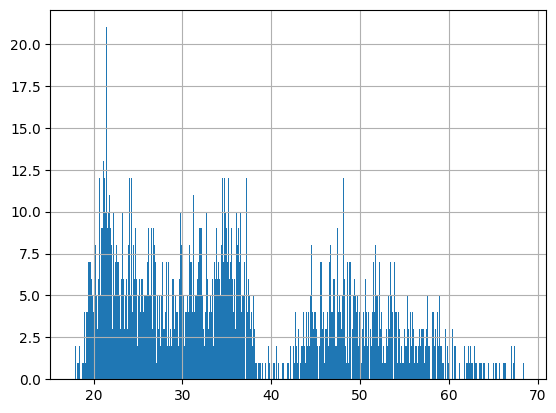

In [33]:
data["Close"].hist(bins=1000)

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.float_ = np.float64
from prophet import Prophet

In [35]:
data = data["Close"].reset_index().rename(columns={"Date": "ds", "Close": "y"})
data

,ds,y
0,2010-01-04,20.879999
1,2010-01-05,20.870001
2,2010-01-06,20.799999
3,2010-01-07,20.600000
4,2010-01-08,20.830000
...,...,...
3697,2024-09-12,19.360001
3698,2024-09-13,19.660000
3699,2024-09-16,20.910000
3700,2024-09-17,21.469999


In [36]:
df_train, df_test = data[: int(len(data) * 0.8)], data[int(len(data) * 0.8) :]

df_train.shape, df_test.shape

((2961, 2), (741, 2))

In [37]:
model = Prophet()
model.fit(df_train)

16:36:28 - cmdstanpy - INFO - Chain [1] start processing
16:36:29 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
periods = df_test.shape[0]
future = model.make_future_dataframe(periods=periods)

In [39]:
forecast = model.predict(future)
df_pred = forecast.tail(periods).reset_index()[["ds", "yhat"]]
df_pred

,ds,yhat
0,2021-10-07,56.506265
1,2021-10-08,56.488018
2,2021-10-09,56.927121
3,2021-10-10,56.955281
4,2021-10-11,56.566181
...,...,...
736,2023-10-13,61.640713
737,2023-10-14,62.086027
738,2023-10-15,62.120900
739,2023-10-16,61.738841


In [40]:
# Import RMSE and MAPE
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Calculate RMSE and MAPE
rmse = root_mean_squared_error(df_test["y"], df_pred["yhat"])
mape = mean_absolute_percentage_error(df_test["y"], df_pred["yhat"])

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 25.104117648979912
MAPE: 0.7334826647498954
